# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext pycodestyle_magic

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$L(w) =  \frac{1}{N}\left[\sum_i^N (y_i - (x_i,w)) ^ 2 \right] + \frac{1}{C}\sum\limits_{i=1}^{D} w_i^2
$$
Перепишем в матричном виде, множитель 1/N опустим

$$ L(w) =  ||Xw- Y|| ^ 2  + \frac{1}{C}||w||^2 $$
 

$$ w_{new} = w_{old} - \frac{\alpha}{n} \sum\limits_{i=1}^{n} ((x_i,w_{old})-y_i)*x_i  - \frac{\alpha}{C} w_{old}$$


где n - размер батча

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
![image.png](attachment:image.png)



c учетом батчей:
$$ w_{new} = w_{old}(1-\frac{2\alpha}{C}) - \frac{\alpha}{n} \sum\limits_{i=1}^{n}(y_i-\sigma(w_{old},x_i))x_i $$



Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

1. Гессиан = $2X^TX$, он не зависит от $w$.
2. $$ w = (X^TX+ \lambda I)^{-1} X^T Y $$



Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$ \frac{\partial{E(L|x_i)}}{\partial {a(x_i)}} = -\frac{ p(y_i = 1 | x_i)}{a(x_i)} +  \frac{p(y_i = 0 | x_i)}{1-a(x_i)} = 0 $$ 


$$\frac{1 - p(y_i = 1 | x_i)}{1 - a(x_i)} -\frac{ p(y_i = 1 | x_i)}{a(x_i)}  = 0 $$


$$a = p(y_i = 1 | x_i)$$

ЧТД

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Не нужно, поскольку $w_0$ является параметром, обеспечивающим сдвиг разделяющей прямой/плоскости/гиперплоскости. Добавление его в регуляризатор приведет к неверному положению разделяющей поверхности, даже если и направление было правильно определено. 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [23]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while True:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [24]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [25]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [26]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [27]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, n_samples=100)

In [28]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    from sklearn.utils import shuffle as shf
    
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X_shuff, y_shuff = shf(X, y)
    for i in range(0, len(y), batch_size):
        X_batch = X_shuff[i:i+batch_size]
        y_batch = y_shuff[i:i+batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [29]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    ## Your code Here
    sigm_value_x = 1/(1+np.exp(-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size = 10):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = 0.5
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss = 0
        alph = np.array([0]+[1]*(self.weights.shape[0]-1))
        if (self.model_type =='lin_reg'):
            loss = 0.5/(len(y_batch))*np.linalg.norm(X_batch.dot(self.weights)-y_batch)**2+ np.linalg.norm(self.weights*alph)**2/(self.C)      
        if (self.model_type =='log_reg'):
            loss  = -sum( y*np.log(sigmoid(-x.dot(self.weights))) + (1-y)*(np.log(1 - sigmoid(-x.dot(self.weights)))) for x,y in zip(X_batch, y_batch)) + 1/self.C*np.linalg.norm(self.weights*alph)**2
        return loss
        
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = np.array([])
        alph = np.array([0]+[1]*(self.weights.shape[0]-1))

        if (self.model_type =='lin_reg'):
            loss_grad = 1/len(y_batch)* sum((x.dot(self.weights)-y)*x for x, y in zip(X_batch, y_batch))+1/(self.C)*self.weights                         
        if (self.model_type=='log_reg'):                       
            loss_grad  = 2/self.C*self.weights*alph +  1/(len(y_batch))*sum(x*(y -sigmoid(-x.dot(self.weights))) for x,y in zip(X_batch, y_batch))
                                        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights =  self.weights - self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        x0 = np.ones((X.shape[0], 1))
        X = np.hstack ((x0, np.array(X)))
        self.weights = np.random.sample(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y ,  shuffle = True, batch_size = self.batch_size )
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        x0 = np.ones((X.shape[0], 1))
        X = np.hstack ((x0, np.array(X)))
        if (self.model_type=='lin_reg'):
            y_hat = [np.heaviside(self.weights.dot(np.array(x)), 1) for x in X]
        
        if (self.model_type=='log_reg'):
            y_hat = [np.heaviside(sigmoid(-self.weights.dot(np.array(x)))- self.threshold, 1) for x in X]  

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
                     
        return y_hat



In [31]:
# сравним наши модели с реализациями из sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LinearRegression

X,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, n_repeated=0)
# SS = StandardScaler()
# X = SS.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = MySGDClassifier(batch_generator, C=10, alpha=0.05, max_epoch=100, model_type='lin_reg')
model.fit(X_train, y_train)



model1 = MySGDClassifier(batch_generator, C=10, alpha=0.01, max_epoch=100, model_type='log_reg')
model1.fit(X_train, y_train)

from sklearn.metrics import classification_report
print ("мой линейный")
print(classification_report(y_test, model.predict(X_test)))

print ("мой логистический ")
print(classification_report(y_test, model1.predict(X_test)))


log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print ("sklearn логистический ")
print(classification_report(y_test, log_model.predict(X_test)))



ridge =RidgeClassifier()
ridge.fit(X_train, y_train)
print ("sklearn ridge ")
print(classification_report(y_test, ridge.predict(X_test)))

lin = LinearRegression()
lin.fit(X_train, y_train)
print ("sklearn  LinearRegression")
print(classification_report(y_test, np.heaviside(lin.predict(X_test), 1)))

мой линейный
              precision    recall  f1-score   support

           0       0.90      0.20      0.33        93
           1       0.59      0.98      0.73       107

    accuracy                           0.62       200
   macro avg       0.75      0.59      0.53       200
weighted avg       0.73      0.62      0.55       200

мой логистический 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.84      0.86      0.85       107

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

sklearn логистический 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        93
           1       0.83      0.86      0.84       107

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       

//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [32]:
def plot_decision_boundary(clf):
    x1 = np.arange(-5, 5)
    x2 = -(clf.weights[0] + clf.weights[1]*x1)/clf.weights[2]
    plt.plot(x1, x2)
           
    pass

[ 2.189301   -0.62042505  0.37375092]


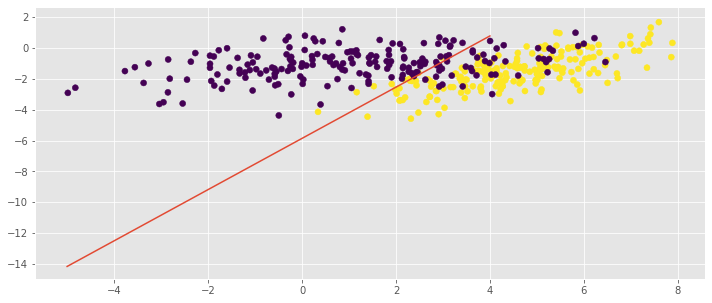

In [33]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
myclf = MySGDClassifier(batch_generator, C=10, alpha=0.1, max_epoch=10, model_type='log_reg', batch_size=10)
myclf.fit(X, y)
print(myclf.weights)
plot_decision_boundary(myclf)


plt.scatter(X[:,0], X[:,1], c=y)

[-0.10258102  0.11182961 -0.09094103]


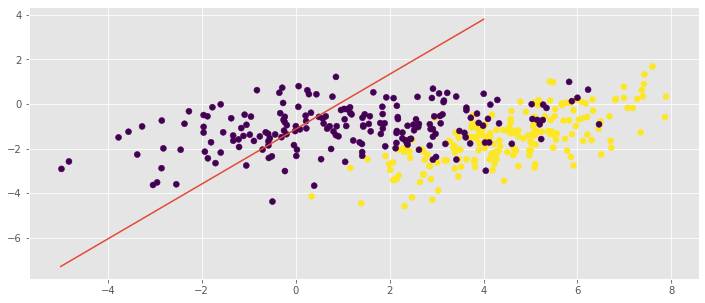

In [34]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
myclf = MySGDClassifier(batch_generator, C=10, alpha=0.1, max_epoch=100, model_type='lin_reg')
myclf.fit(X, y)
print(myclf.weights)
plot_decision_boundary(myclf)


plt.scatter(X[:,0], X[:,1], c=y)



Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [35]:
from sklearn.datasets import make_classification

In [36]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

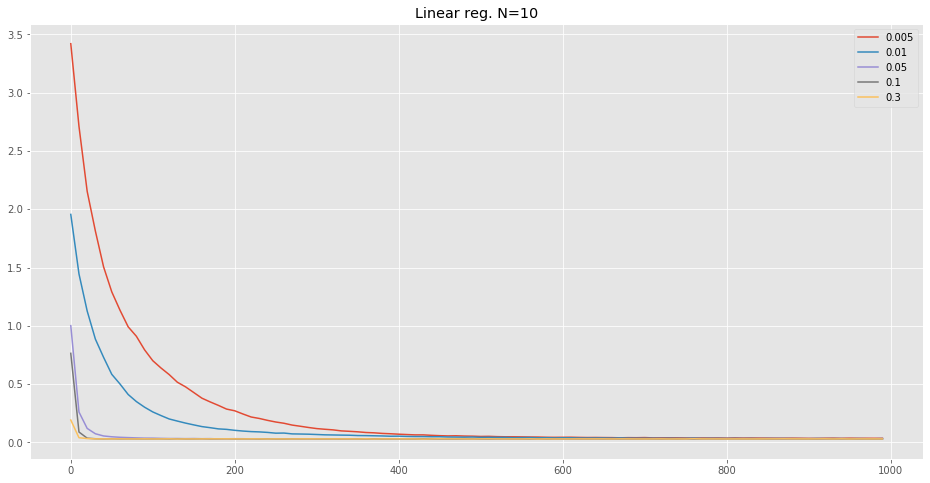

In [37]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.3]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='lin_reg', batch_size=1000)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 10):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+10]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 10))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Linear reg. N=10")    
plt.legend()        
        

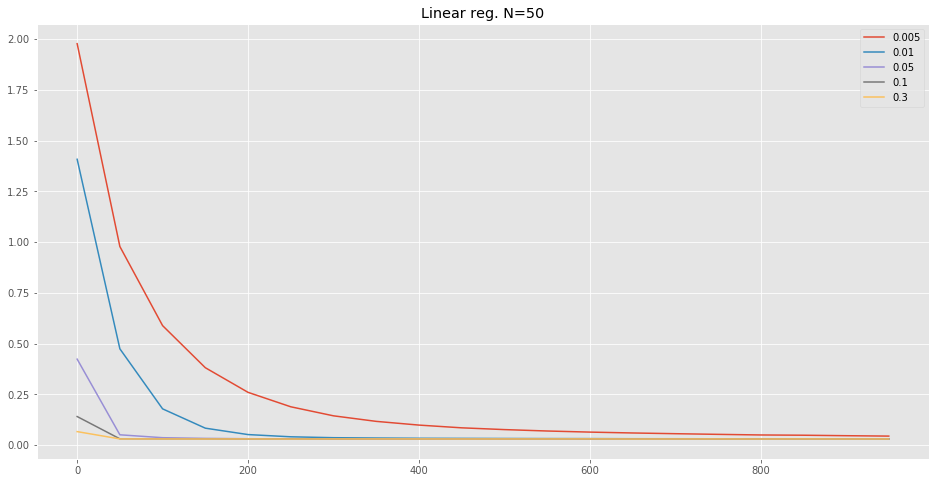

In [38]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.3]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='lin_reg', batch_size=1000)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 50):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+50]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 50))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Linear reg. N=50")    
plt.legend()        
        

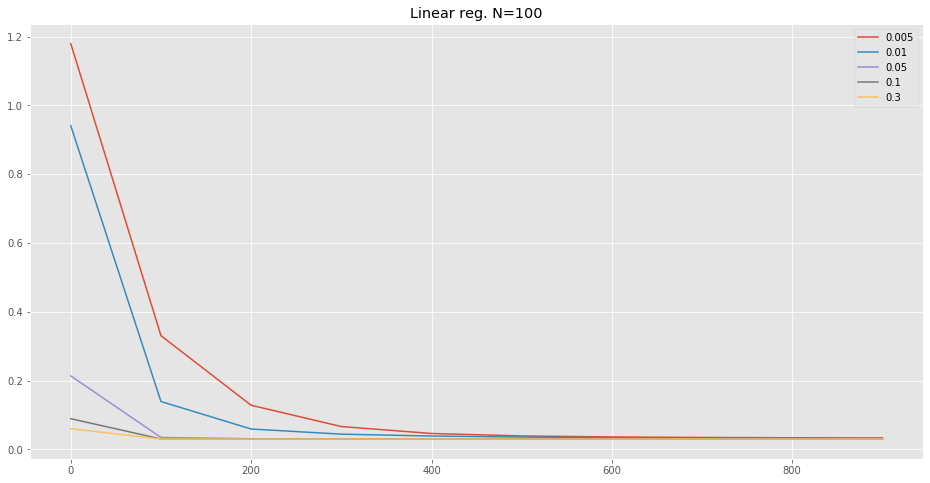

In [39]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.3]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='lin_reg', batch_size=1000)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 100):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+100]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 100))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Linear reg. N=100")    
plt.legend()        
        

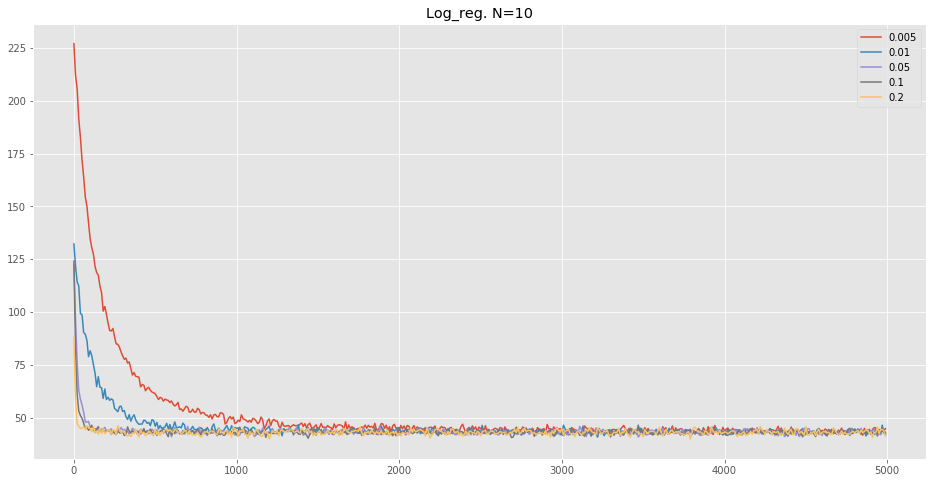

In [40]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.2]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='log_reg', batch_size=200)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 10):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+10]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 10))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Log_reg. N=10")    
plt.legend()        
        

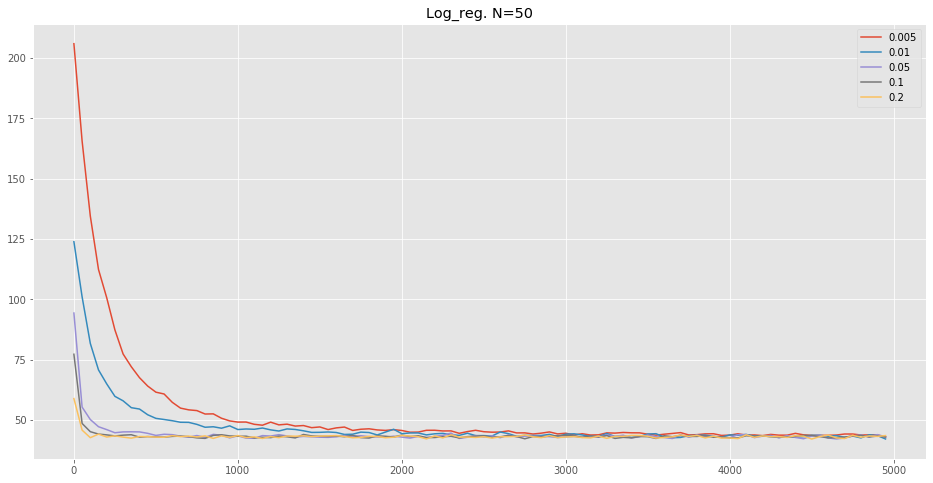

In [41]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.2]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='log_reg', batch_size=200)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 50):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+50]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 50))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Log_reg. N=50")       
plt.legend()        

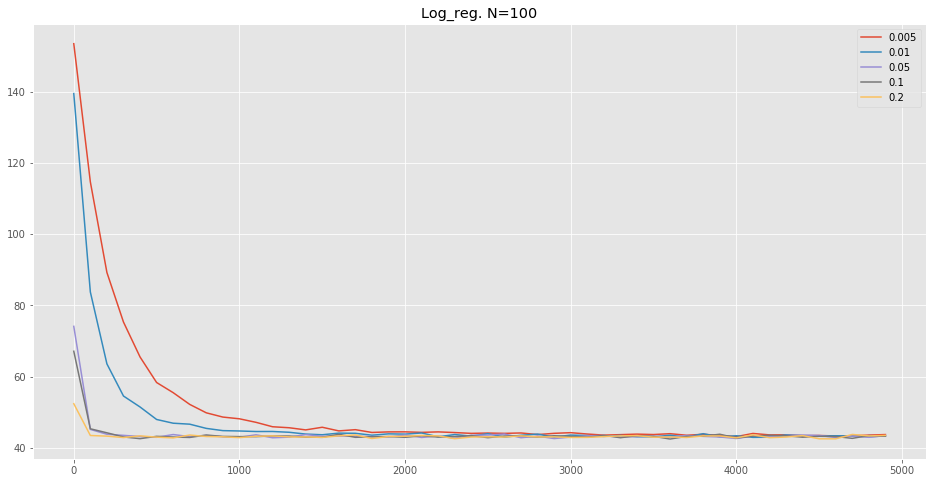

In [42]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
for alph in [0.005, 0.01, 0.05, 0.1, 0.2]:
    myclf = MySGDClassifier(batch_generator, C=10, alpha=alph, max_epoch=10, model_type='log_reg', batch_size=200)
    myclf.fit(X, y)
    y_to_plt = []
    for i in range(0, len(myclf.errors_log['loss']), 100):   
        y_to_plt.append(np.mean(myclf.errors_log['loss'][i:i+100]))
    x_to_plt = list(range(0, len(myclf.errors_log['iter']), 100))  
    plt.plot(x_to_plt, y_to_plt, label = str(alph))
plt.title("Log_reg. N=100")   
plt.legend()       

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [47]:
## Your Code Here
fig = plt.figure(figsize=(16,8))
y_to_plt = [] 
x_to_ply = np.logspace(3, -3, 10)
for C_ in x_to_plt:
    myclf = MySGDClassifier(batch_generator, C=C_, alpha=0.001, max_epoch=100, model_type='lin_reg', batch_size=1000)
    myclf.fit(X, y)
    y_to_plt.append(np.mean(myclf.weights)) 
plt.xscale('log')    
plt.plot(x_to_plt, y_to_plt)
plt.title("Зависимость среднего значения весов линейного классификатора от параметра регуляризации С")   
   
    

ZeroDivisionError: division by zero

<Figure size 1152x576 with 0 Axes>

In [48]:
x_to_ply = np.logspace(3, -3, 10)
x_to_ply

array([1.00000000e+03, 2.15443469e+02, 4.64158883e+01, 1.00000000e+01,
       2.15443469e+00, 4.64158883e-01, 1.00000000e-01, 2.15443469e-02,
       4.64158883e-03, 1.00000000e-03])

//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in multiply


Text(0.5, 1.0, 'Зависимость среднего значения весов логистической регресии от параметра регуляризации С')

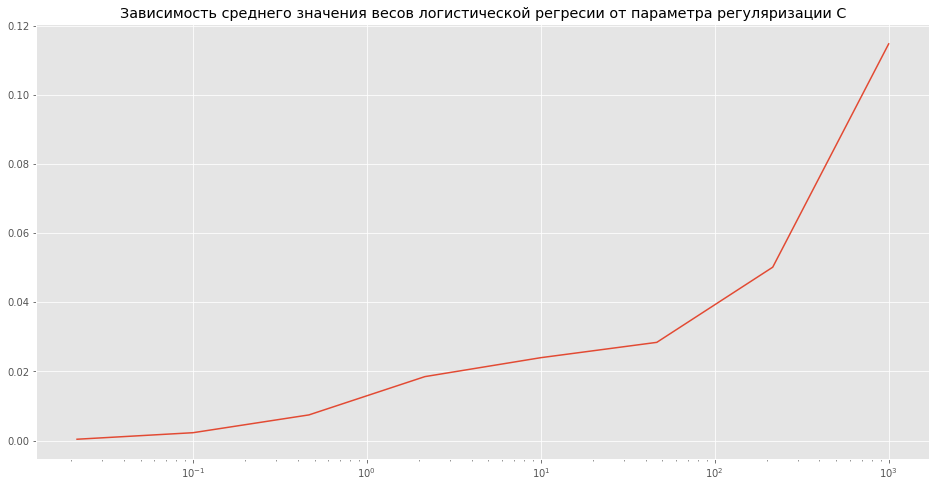

In [49]:
fig = plt.figure(figsize=(16,8))
y_to_plt = [] 
x_to_plt = np.logspace(3, -3, 10)
for C_ in x_to_plt:
    myclf = MySGDClassifier(batch_generator, C=C_, alpha=0.01, max_epoch=10, model_type='log_reg', batch_size=200)
    myclf.fit(X, y)
    y_to_plt.append(np.mean(myclf.weights)) 

plt.xscale('log')
plt.plot(x_to_plt, y_to_plt)
plt.title("Зависимость среднего значения весов логистической регресии от параметра регуляризации С")   
   

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [50]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [51]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [52]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [53]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [55]:
for ep in [10, 15 ,50, 100, 150, 300]:
    for batch_s in [10, 20, 50, 100, 200, 500, 1000, 2000]:
        myclf = MySGDClassifier(model_type="log_reg", batch_size=batch_s,max_epoch=ep, batch_generator=batch_generator)
        print ("time for max_ep = {0} and batch_size = {1}".format(ep, batch_s))
        %time myclf.fit(X_train, y_train)
        print('\n\n')

time for max_ep = 10 and batch_size = 10
CPU times: user 3.47 s, sys: 68.4 ms, total: 3.54 s
Wall time: 3.49 s



time for max_ep = 10 and batch_size = 20
CPU times: user 3.18 s, sys: 62.6 ms, total: 3.25 s
Wall time: 3.2 s



time for max_ep = 10 and batch_size = 50
CPU times: user 3.17 s, sys: 142 ms, total: 3.31 s
Wall time: 3.2 s



time for max_ep = 10 and batch_size = 100
CPU times: user 3.07 s, sys: 91.2 ms, total: 3.16 s
Wall time: 3.09 s



time for max_ep = 10 and batch_size = 200
CPU times: user 3.03 s, sys: 65.6 ms, total: 3.09 s
Wall time: 3.04 s



time for max_ep = 10 and batch_size = 500
CPU times: user 3.01 s, sys: 82.9 ms, total: 3.09 s
Wall time: 3.02 s



time for max_ep = 10 and batch_size = 1000
CPU times: user 3.03 s, sys: 79.8 ms, total: 3.11 s
Wall time: 3.04 s



time for max_ep = 10 and batch_size = 2000
CPU times: user 3 s, sys: 90.9 ms, total: 3.09 s
Wall time: 3.02 s



time for max_ep = 15 and batch_size = 10
CPU times: user 5.19 s, sys: 111 ms, total: 5.

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [56]:
from itertools import zip_longest

prev_group = 1
prev_index = 0
groups_indices = []
for k, i in zip_longest(range(len(groups_train) + 1),
                        groups_train, fillvalue=-1):
    if prev_group != i:
        groups_indices.append((prev_index, k))
        prev_group = i
        prev_index = k
        

In [57]:
from itertools import product

c_ = np.logspace(-2, 2, 7)
alpha_ = (0.05, 0.01, 0.001)
max_epoch_ = (5, 10, 15, 25, 50, 100)



In [59]:
max_result = 0


for (C, alpha, max_epoch) in product(c_, alpha_, max_epoch_):
    result = []
    print((C, alpha, max_epoch))
    for (start, end) in groups_indices:
        clf = MySGDClassifier(batch_size=1000, C=C, alpha=alpha,
                              max_epoch=max_epoch, model_type='log_reg', batch_generator = batch_generator)
        
        clf.fit(X_train[start:end], y_train[start:end])
        result.append( f1_score(y_train[start:end], clf.predict(X_train[start:end])) )
    result = np.mean(result)
    if result > max_result:
        max_result = result
        params = {'C': C, 'alpha': alpha, 'max_epoch': max_epoch}
print (max_result, params, sep='\n')

(0.01, 0.05, 5)


//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.01, 0.05, 10)
(0.01, 0.05, 15)
(0.01, 0.05, 25)
(0.01, 0.05, 50)
(0.01, 0.05, 100)
(0.01, 0.01, 5)
(0.01, 0.01, 10)
(0.01, 0.01, 15)
(0.01, 0.01, 25)
(0.01, 0.01, 50)
(0.01, 0.01, 100)
(0.01, 0.001, 5)
(0.01, 0.001, 10)
(0.01, 0.001, 15)
(0.01, 0.001, 25)
(0.01, 0.001, 50)
(0.01, 0.001, 100)
(0.046415888336127774, 0.05, 5)
(0.046415888336127774, 0.05, 10)
(0.046415888336127774, 0.05, 15)
(0.046415888336127774, 0.05, 25)
(0.046415888336127774, 0.05, 50)
(0.046415888336127774, 0.05, 100)
(0.046415888336127774, 0.01, 5)
(0.046415888336127774, 0.01, 10)
(0.046415888336127774, 0.01, 15)
(0.046415888336127774, 0.01, 25)
(0.046415888336127774, 0.01, 50)
(0.046415888336127774, 0.01, 100)
(0.046415888336127774, 0.001, 5)
(0.046415888336127774, 0.001, 10)
(0.046415888336127774, 0.001, 15)
(0.046415888336127774, 0.001, 25)
(0.046415888336127774, 0.001, 50)
(0.046415888336127774, 0.001, 100)
(0.21544346900318834, 0.05, 5)
(0.21544346900318834, 0.05, 10)
(0.21544346900318834, 0.05, 15)
(0.215443

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

clf = MySGDClassifier(batch_size=1000, C=0.01, alpha=0.05, max_epoch=5, model_type='log_reg',batch_generator = batch_generator )
clf.fit(X_train, y_train)

//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


MySGDClassifier(C=0.01, alpha=0.05,
                batch_generator=<function batch_generator at 0x11925f950>,
                batch_size=1000, max_epoch=5, model_type='log_reg')

In [20]:
thres = np.linspace(0.01, 0.99, 99)
result = np.zeros(len(thres))
for i, t in enumerate(thres):
    clf.threshold = t
    result[i] = f1_score(y_val, clf.predict(X_val))

best_index = result.argmax()
best_t = thres[best_index]
print(bect_t, result[best_index])

0.26 0.6053639846743296


//miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [51]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(test_data.shape[0]):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, pair_id, title))
    
X_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, pair_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            *_, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        pairs_id.append(pair_id)
X_test = np.array(X_test)
X_test = scaler.transform(X_test)
print(X_test.shape)

(16627, 15)


In [52]:
clf.threshold = best_t
y_predict = clf.predict(X_test)

In [53]:
clf.threshold = best_t
y_predict = clf.predict(X_test)
with open('predict.csv', 'w') as f:
    print('pair_id,target', file = f)
    for target, pair_id in zip(y_predict, pairs_id):
        print(pair_id, int(target), sep=',', file=f)

Kaggle:  Polina Aleinikova

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***